# 1. Library Import & Drive Mount


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 나눔고딕 폰트 설치(런타임 재시작 필요!)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use(['ggplot'])

plt.rc('font', family='NanumBarunGothic') # 나눔고딕 폰트 설정
plt.rcParams['font.size'] = 20

# 2. EDA

## 1) 연도별 공공기관 CCTV 설치 대수

In [ ]:
!ls -l '/content/drive/My Drive/Project_CCTV/datasets/cctv_2015_2019.xlsx'

-rw------- 1 root root 8937 Apr 20 02:25 '/content/drive/My Drive/Project_CCTV/datasets/cctv_2015_2019.xlsx'


In [ ]:
df = pd.read_excel('/content/drive/My Drive/Project_CCTV/datasets/cctv_2015_2019.xlsx')

In [ ]:
df = df.T

In [ ]:
df.columns=['총 CCTV 설치대수(대)', '전년대비 증가 대수(대)', '전년대비 증감비(%)']

df.drop(df.index[[0]],inplace=True)
df.reset_index(inplace=True, drop=True)
df.index=range(2015, 2020)
df

,총 CCTV 설치대수(대),전년대비 증가 대수(대),전년대비 증감비(%)
2015,"739,232","84,202",12.9
2016,"845,136","105,904",14.3
2017,"954,261","109,125",12.9
2018,"1,032,879","78,618",8.2
2019,"1,148,770","115,891",11.2


In [ ]:
for i in df.columns[:-1]:
    df[i] = df[i].str.replace(',', '').astype('int')

df[df.columns[-1]] = df[df.columns[-1]].astype('float')

In [ ]:
df

,총 CCTV 설치대수(대),전년대비 증가 대수(대),전년대비 증감비(%)
2015,739232,84202,12.9
2016,845136,105904,14.3
2017,954261,109125,12.9
2018,1032879,78618,8.2
2019,1148770,115891,11.2


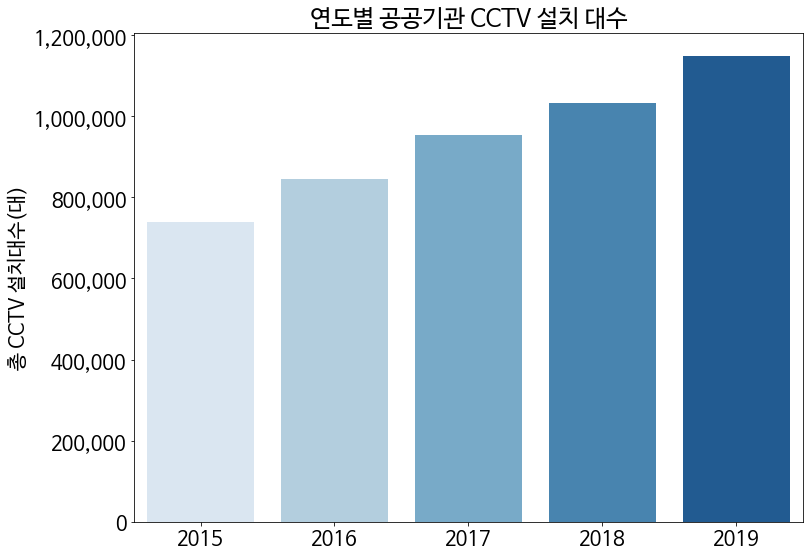

In [ ]:
from matplotlib.ticker import StrMethodFormatter

plt.figure(figsize=(12,9))
sns.barplot(x=df.index, y=df.columns[0], data=df, palette='Blues')
plt.title('연도별 공공기관 CCTV 설치 대수')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:0,.0f}'))
plt.show()

## 2) 관제 요원 증가 현황

In [ ]:
controller = pd.DataFrame(data=[[1968, 2255, 2674, 2841, 2918]], index=['관제요원 증가 현황'])

controller = controller.T
controller.index=range(2015, 2020)
controller

,관제요원 증가 현황
2015,1968
2016,2255
2017,2674
2018,2841
2019,2918


## 3) 관제 인력 1명당 관제 대수

In [ ]:
df = pd.concat([df,controller], axis=1)

df

,총 CCTV 설치대수(대),전년대비 증가 대수(대),전년대비 증감비(%),관제요원 증가 현황
2015,739232,84202,12.9,1968
2016,845136,105904,14.3,2255
2017,954261,109125,12.9,2674
2018,1032879,78618,8.2,2841
2019,1148770,115891,11.2,2918


In [ ]:
df['1명당 관제 대수'] = df['총 CCTV 설치대수(대)'] / df['관제요원 증가 현황']
df['1명당 관제 대수'] = df['1명당 관제 대수'].astype(int)
df.index=range(2015, 2020)
df

,총 CCTV 설치대수(대),전년대비 증가 대수(대),전년대비 증감비(%),관제요원 증가 현황,1명당 관제 대수
2015,739232,84202,12.9,1968,375
2016,845136,105904,14.3,2255,374
2017,954261,109125,12.9,2674,356
2018,1032879,78618,8.2,2841,363
2019,1148770,115891,11.2,2918,393


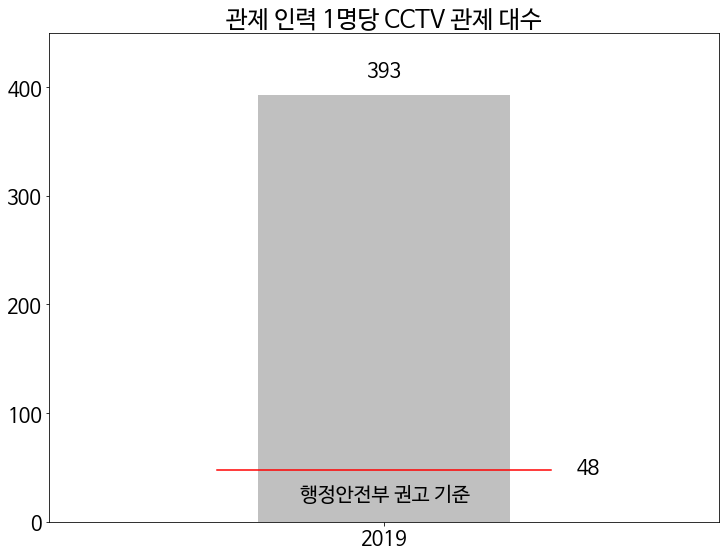

In [ ]:
plt.figure(figsize=(12,9))

df.iloc[-1:,-1].plot.bar(color='silver', width=3)
plt.xlim([-4, 4])
plt.ylim(0, 450)
plt.title('관제 인력 1명당 CCTV 관제 대수')
plt.xticks(rotation=360)
plt.yticks(range(0, 500, 100))

plt.text(-0.2, 410, r'393')

plt.plot([-2,2], [48,48], 'r')
plt.text(-1, 20, r'행정안전부 권고 기준')
plt.text(2.3, 45, r'48')
plt.show()

## 4) 관제인력 근무 형태

In [ ]:
data={'3조2교대':[3.75], '4조2교대':[31.25], '4조3교대':[51.9], '4조4교대':[3.12], '5조3교대':[1.88], '기타':[8.1]}

working_form = pd.DataFrame(data)
working_form = working_form.sort_values(by=0, axis=1, ascending=False)

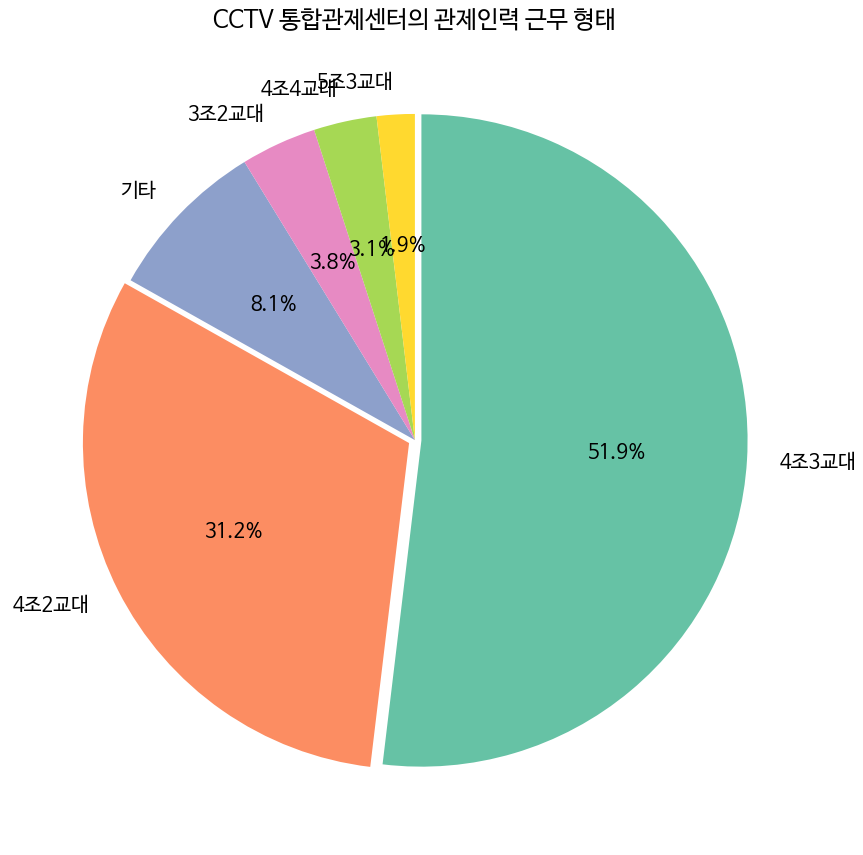

In [ ]:
plt.figure(figsize=(15,15))

explode = [0.02, 0.02, 0, 0, 0, 0]

pie = plt.pie(x=working_form, labels=working_form.columns, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=plt.cm.Set2.colors)

plt.title('CCTV 통합관제센터의 관제인력 근무 형태')

plt.show()

## 5) CCTV 관련 검색어 트렌드

In [ ]:
!ls -l '/content/drive/My Drive/Project_CCTV/datasets/cctv_naver.xlsx'

-rw------- 1 root root 37979 Apr 20 05:56 '/content/drive/My Drive/Project_CCTV/datasets/cctv_naver.xlsx'


In [ ]:
trend = pd.read_excel('/content/drive/My Drive/Project_CCTV/datasets/cctv_naver.xlsx')

In [ ]:
trend

,url,http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_b1ac1065fd268a5859fa6eb5b4c09162
0,주제,통검
1,범위,합계
2,기간,일간 : 2016-04-19 ~ 2021-04-19
3,성별,"전체(여성,남성)"
4,연령대,전체
...,...,...
1828,2021-04-15,47.20092
1829,2021-04-16,43.68289
1830,2021-04-17,32.3332
1831,2021-04-18,36.55099


In [ ]:
trend.columns=['Date', 'Count']
trend.drop(index=range(6), inplace=True)
trend.reset_index(drop=True)

,Date,Count
0,2016-04-19,37.34662
1,2016-04-20,38.99539
2,2016-04-21,41.52607
3,2016-04-22,39.42676
4,2016-04-23,27.58819
...,...,...
1822,2021-04-15,47.20092
1823,2021-04-16,43.68289
1824,2021-04-17,32.3332
1825,2021-04-18,36.55099


In [ ]:
trend.drop(trend[trend['Date'] < '2018-01-01'].index, axis=0, inplace=True)
trend.reset_index(drop=True, inplace=True)
trend

,Date,Count
0,2018-01-01,19.9674
1,2018-01-02,28.5947
2,2018-01-03,29.71625
3,2018-01-04,27.81825
4,2018-01-05,25.24923
...,...,...
1200,2021-04-15,47.20092
1201,2021-04-16,43.68289
1202,2021-04-17,32.3332
1203,2021-04-18,36.55099


In [ ]:
trend[trend.columns[0]] = trend[trend.columns[0]].astype('datetime64')
trend[trend.columns[1]] = trend[trend.columns[1]].astype('float')

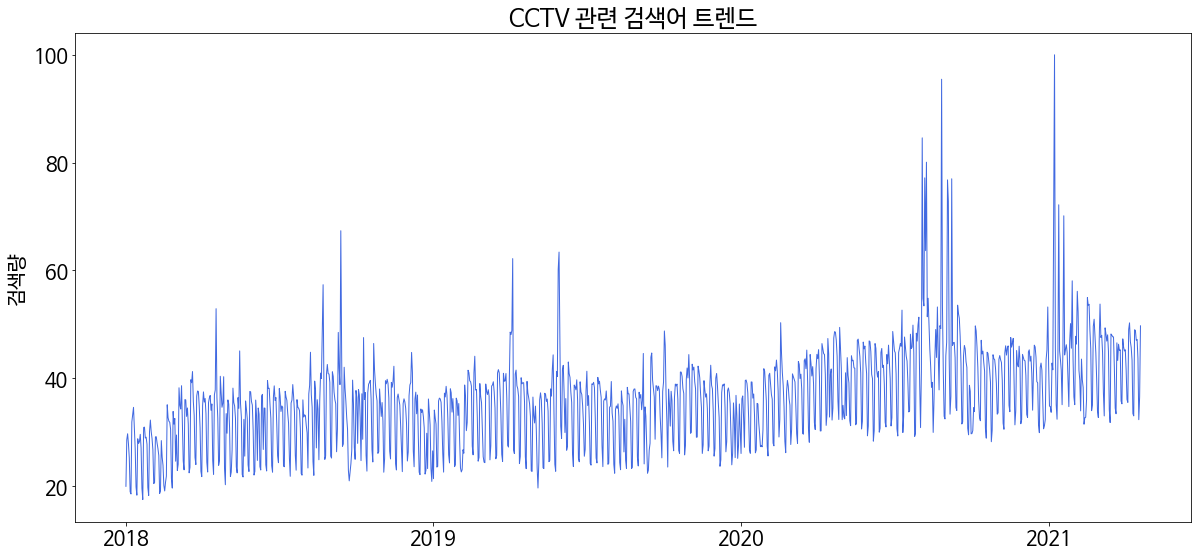

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(20,9))
sns.lineplot(x=trend['Date'], y=trend['Count'], data=trend, linewidth=1, color='royalblue')

plt.title('CCTV 관련 검색어 트렌드')
plt.ylabel('검색량')

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

loc = mdates.YearLocator()
ax.xaxis.set_major_locator(loc)

plt.xlabel('')
plt.show()

# 3. 범죄별 발생 빈도

In [ ]:
!ls -l '/content/drive/My Drive/Project_CCTV/datasets/2017_to_2019_crime_data_in_korea.xlsx'

-rw------- 1 root root 31585 Apr 14 08:16 '/content/drive/My Drive/Project_CCTV/datasets/2017_to_2019_crime_data_in_korea.xlsx'


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('/content/drive/My Drive/Project_CCTV/datasets/2017_to_2019_crime_data_in_korea.xlsx')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   죄종별     232 non-null    object
 1   2019    232 non-null    object
 2   2019.1  232 non-null    object
 3   2019.2  232 non-null    object
 4   2019.3  232 non-null    object
 5   2018    232 non-null    object
 6   2018.1  232 non-null    object
 7   2018.2  232 non-null    object
 8   2018.3  232 non-null    object
 9   2017    232 non-null    object
 10  2017.1  232 non-null    object
 11  2017.2  232 non-null    object
 12  2017.3  232 non-null    object
dtypes: object(13)
memory usage: 23.7+ KB


In [ ]:
data.head()

,죄종별,2019,2019.1,2019.2,2019.3,2018,2018.1,2018.2,2018.3,2017,2017.1,2017.2,2017.3
0,죄종별(2),발생건수 (건),검거건수 (건),발생건수 대비 검거건수 (%),검거인원 (명),발생건수 (건),검거건수 (건),발생건수 대비 검거건수 (%),검거인원 (명),발생건수 (건),검거건수 (건),발생건수 대비 검거건수 (%),검거인원 (명)
1,살인기수,297,299,100.7,362,309,298,96.4,358,301,301,100,354
2,살인미수등,482,481,99.8,534,488,484,99.2,525,524,525,100.2,567
3,강도,798,801,100.4,1376,821,821,100,1219,967,977,101,1525
4,강간,5310,5197,97.9,6230,5293,5206,98.4,6087,5223,5134,98.3,6012


In [ ]:
data = data[['죄종별', '2017', '2018', '2019']]
data.head(10)

,죄종별,2017,2018,2019
0,죄종별(2),발생건수 (건),발생건수 (건),발생건수 (건)
1,살인기수,301,309,297
2,살인미수등,524,488,482
3,강도,967,821,798
4,강간,5223,5293,5310
5,유사강간,636,776,782
6,강제추행,17947,17053,17120
7,기타 강간·강제추행 등,304,356,325
8,방화,1372,1691,1362
9,절도,160627,155723,165358


In [ ]:
df = data.drop(0)
df.reset_index(drop=True, inplace=True)
df

,죄종별,2017,2018,2019
0,살인기수,301,309,297
1,살인미수등,524,488,482
2,강도,967,821,798
3,강간,5223,5293,5310
4,유사강간,636,776,782
...,...,...,...,...
226,"허위감정,증거인멸·은닉,증인은닉죄",75,89,117
227,형사소송법,1,1,2
228,형의실효등에관한법률,6,9,12
229,화물자동차운수사업법,2096,2379,2295


In [ ]:
df.dtypes

죄종별     object
2017    object
2018    object
2019    object
dtype: object

In [ ]:
df.iloc[:,1:] = df.iloc[:,1:].replace('-', '0')

In [ ]:
df = df.astype({'2017':'int', '2018':'int', '2019':'int'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   죄종별     231 non-null    object
 1   2017    231 non-null    int64 
 2   2018    231 non-null    int64 
 3   2019    231 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.3+ KB


In [ ]:
df['평균'] = df.iloc[:,1:].mean(axis=1).astype('int')

In [ ]:
df = df.sort_values(by='평균', ascending=False)
df.reset_index(drop=True, inplace=True)
df

,죄종별,2017,2018,2019,평균
0,사기,231489,270029,304472,268663
1,교통사고,269434,237354,240802,249196
2,교통사고외,231728,171017,136552,179765
3,절도,160627,155723,165358,160569
4,폭행,159641,159267,157197,158701
...,...,...,...,...,...
226,아동학대처벌법위반(피해자 등에 대한 강요행위),0,0,0,0
227,특가법(단체등의조직),0,0,0,0
228,특경법(무인가단기금융업),0,0,0,0
229,수질환경보전법,0,0,0,0


In [ ]:
df[df['죄종별'].str.contains('절도')]

,죄종별,2017,2018,2019,평균
3,절도,160627,155723,165358,160569
16,특수절도,13128,11955,11783,12288
30,야간주거침입절도,6659,5994,6329,6327
69,절도(상습),1940,1218,1070,1409
85,특가법(절도),641,1197,1564,1134
140,야간주거침입절도(상습),132,89,122,114
154,특수절도(상습),87,56,81,74


In [ ]:
df[df['죄종별'].str.contains('폭행')]

,죄종별,2017,2018,2019,평균
4,폭행,159641,159267,157197,158701


In [ ]:
df[df['죄종별'].str.contains('학대')]

,죄종별,2017,2018,2019,평균
58,아동복지법위반(유기·학대 등),1822,1664,2215,1900
122,유기와학대의죄,237,260,199,232
150,아동학대처벌법위반(아동복지시설 종사자 등의 아동학대 가중처벌),78,102,97,92
158,아동학대처벌법위반(기타),62,55,67,61
168,아동학대처벌법위반(처분 불이행 등),26,30,42,32
175,아동학대처벌법위반(유기·학대 등),14,19,33,22
223,아동학대처벌법위반(비밀유지의무위반 등),0,0,2,0
224,아동학대처벌법위반(업무수행 방해 등),1,0,0,0
226,아동학대처벌법위반(피해자 등에 대한 강요행위),0,0,0,0


In [ ]:
df[df['죄종별'].str.contains('방화')]

,죄종별,2017,2018,2019,평균
66,방화,1372,1691,1362,1475


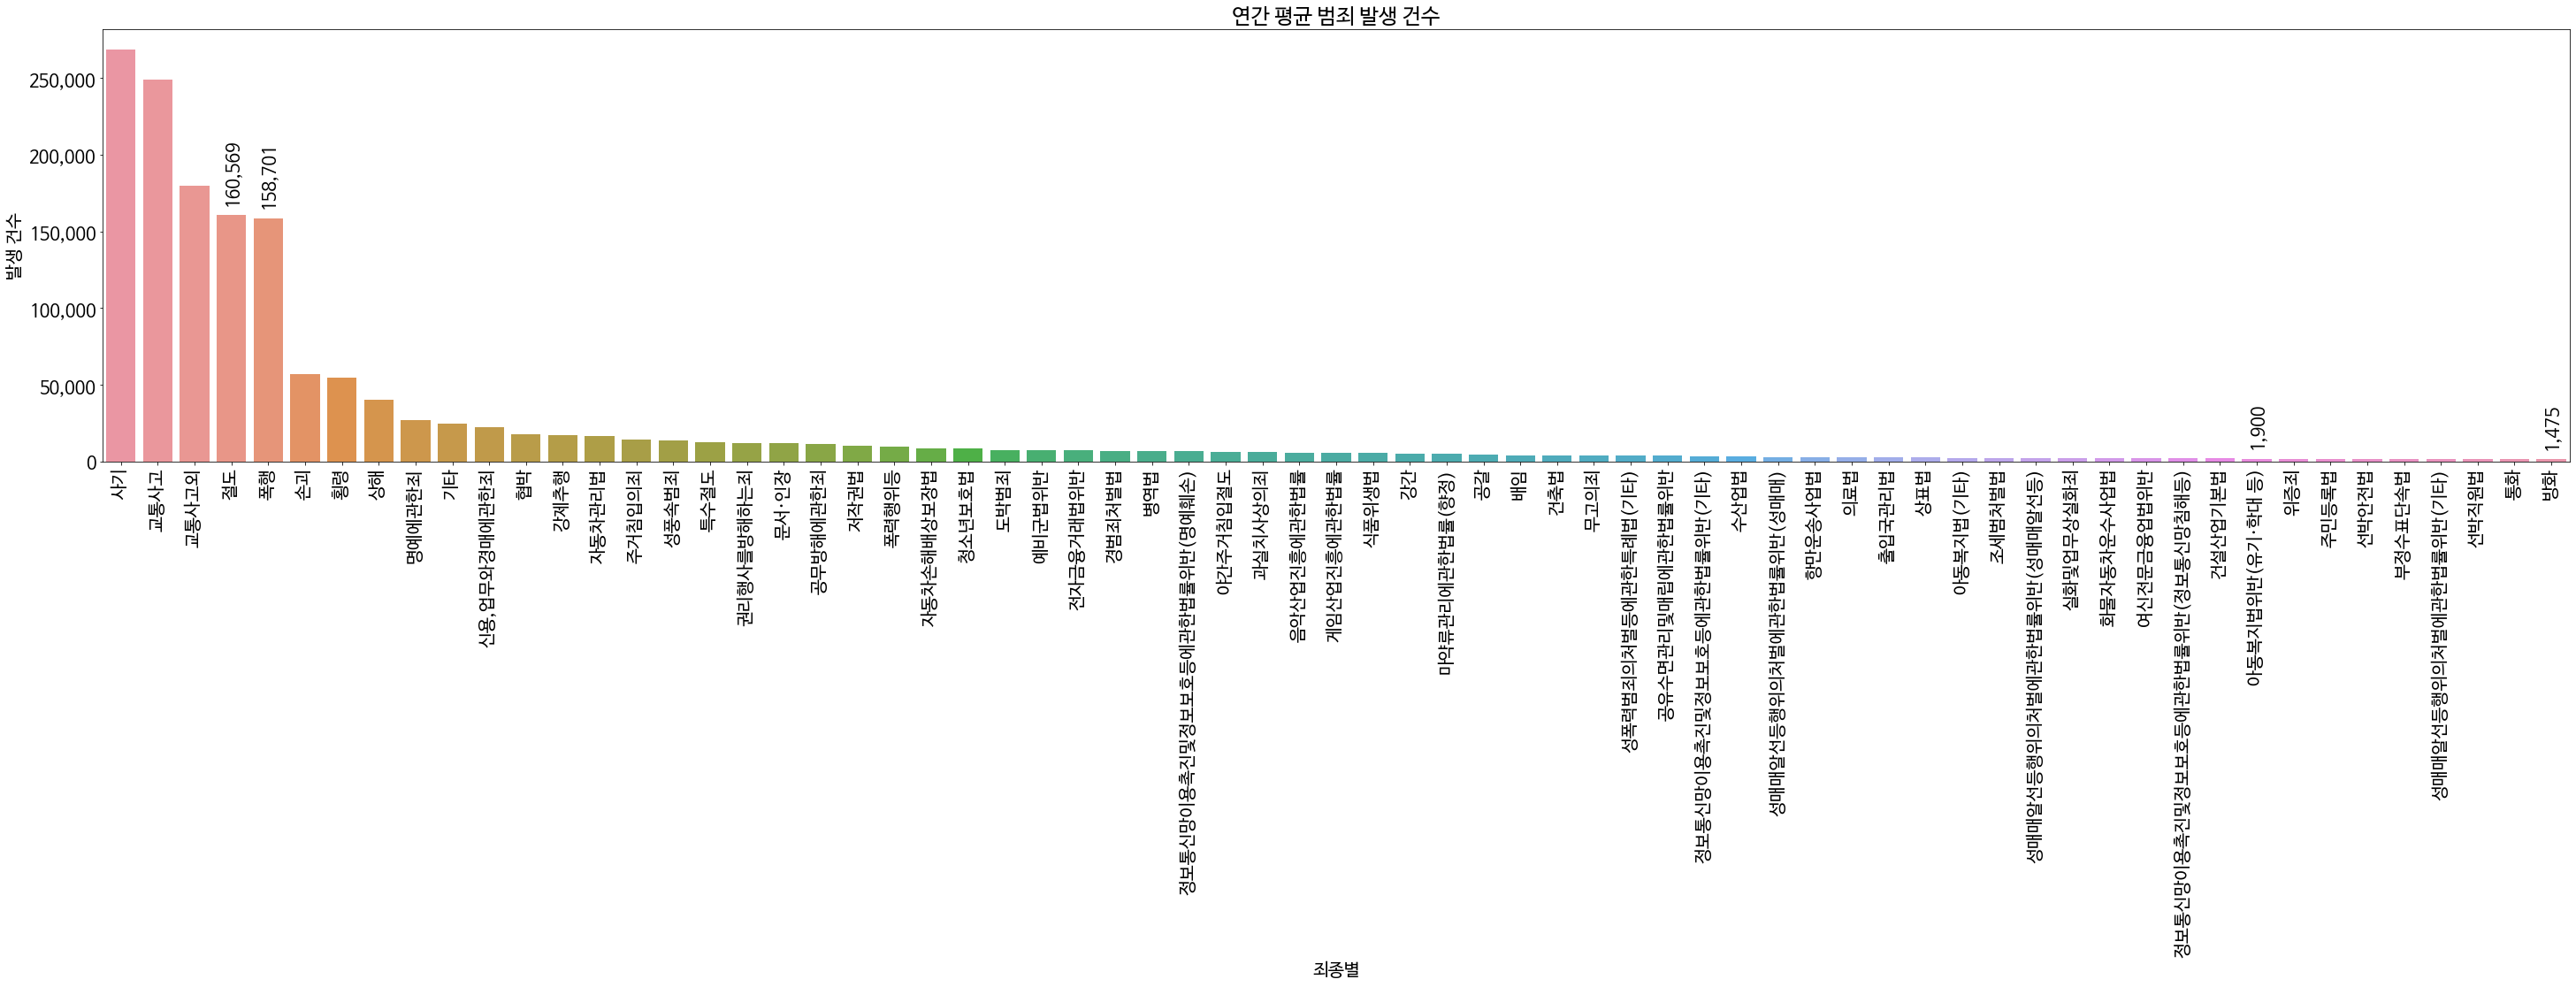

In [ ]:
plt.figure(figsize=(50, 9))

sns.barplot(x=df.iloc[:67,0] , y='평균', data=df)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:0,.0f}'))
plt.title('연간 평균 범죄 발생 건수')
plt.xticks(rotation=90)
plt.ylabel('발생 건수')

index = [3, 4, 58, 66]
y = df.iloc[:67,-1]

xlocs, xlabs = plt.xticks()

for i, v in enumerate(y):
    if i in index:
        plt.text(xlocs[i] - 0.25, v + 10000, '{:0,.0f}'.format(v), rotation=90)

plt.show()